# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

## Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We can see that the dataset has both numerical and categorical data. This dataset contains the details of the loan applicants.The target variable is Loan_Status

## Exploatory Data Analysis

In [4]:
df.shape

(614, 13)

We have 614 rows and 13 columns out of which one is a target variable

In [5]:
#getting a general overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that there is object, int and float datatype, we will see into the columns with the different datatype going forward. Here in this info we see no null values. We will further confirm

In [6]:
#Checking the unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We see that the loan status has 2 classes, making it a classification problem. Also we can see that the Loan_ID is just an unique number provided to the loan applicants which will have no impact on the prediction, hence we will consider dropping that column

In [7]:
# Removing unwanted column
df.drop("Loan_ID",axis=1,inplace=True)

In [8]:
#checking the value counts of each column

for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())


 __________________________________
Male      489
Female    112
Name: Gender, dtype: int64

 __________________________________
Yes    398
No     213
Name: Married, dtype: int64

 __________________________________
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 __________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 __________________________________
No     500
Yes     82
Name: Self_Employed, dtype: int64

 __________________________________
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

 __________________________________
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

 __________________________________
120.0    20
110.0    17
100.0    15
16

We have two counts in Loan_Status namely "Y" and "N". Here "Y" stands for "Yes" that is the loan of the applicant is approved and "N" stands for "No" that is the loan of the applicant is not approved.

From this we can see that the dataset is slightly imbalanced

In [9]:
#checking the datatypes in the columns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
#checking the numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<AxesSubplot:>

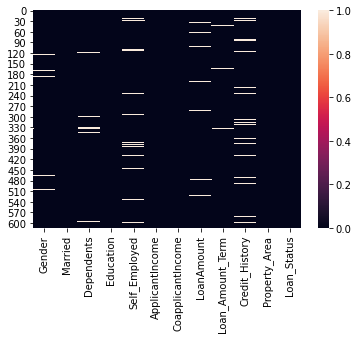

In [12]:
#checking the null values
print(df.isnull().sum())
sns.heatmap(df.isnull())

We can see that we have null values in both the categorical and numerical columns, hence will impute the null values accordingly

## Imputation

In [14]:
#Imputing the categorical values with the mode of the respective columns

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


#Filling the numerical column with the median of the respective column
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

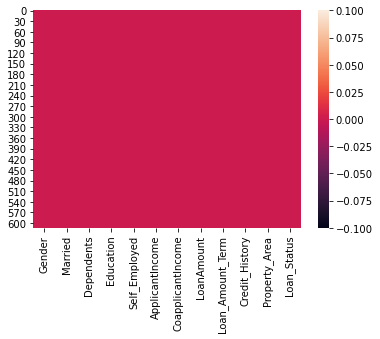

In [15]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

Now we see that all the null values has been treated as we have no null values left

In [16]:
# Statistical Presentation of the Dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.`

# Data Visualization

## Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


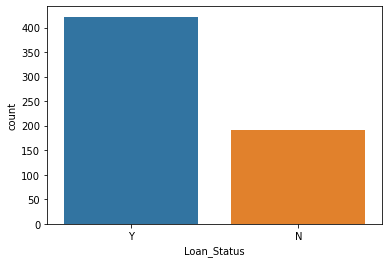

In [17]:
# Visualizing the label (Loan Status)
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

As we have seen earlier aswell, this data is imbalanced. The Y is higher to a considerate amount then N, we will SMOTE it going forward.

In [18]:
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## Visualizing the Categorical columns

Male      502
Female    112
Name: Gender, dtype: int64


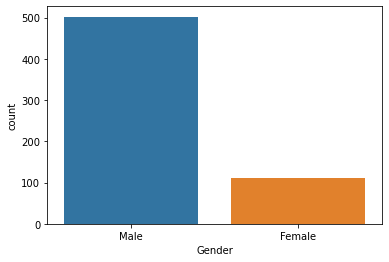

In [19]:
#Gender
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

There are higher male applicants

Yes    401
No     213
Name: Married, dtype: int64


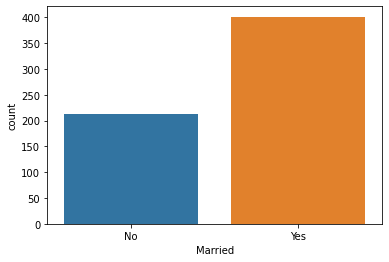

In [20]:
#Married
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

There are higher Married applicants

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


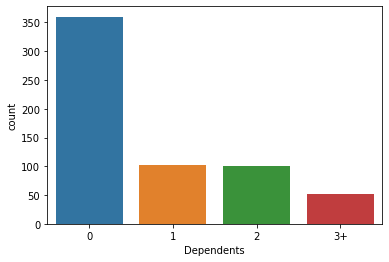

In [21]:
#Dependents
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

There are higher number of applicants with 0 dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


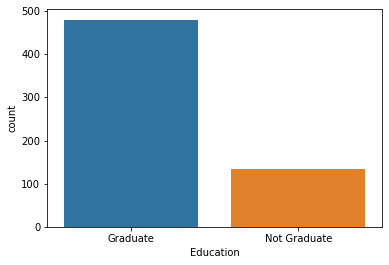

In [22]:
# Education
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

There are higher number of Graduate applicants

No     532
Yes     82
Name: Self_Employed, dtype: int64


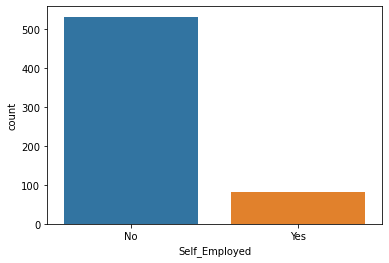

In [23]:
#Self_Employed
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

Applicant who are not self employeed are comparitively higher

1.0    525
0.0     89
Name: Credit_History, dtype: int64


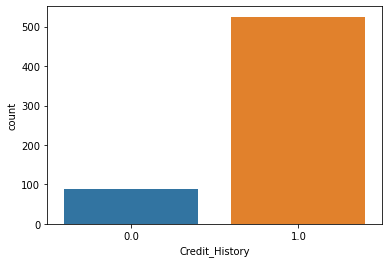

In [24]:
# Credit_History
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

## Visualizing the distribution of the DataSet (numerical columns)

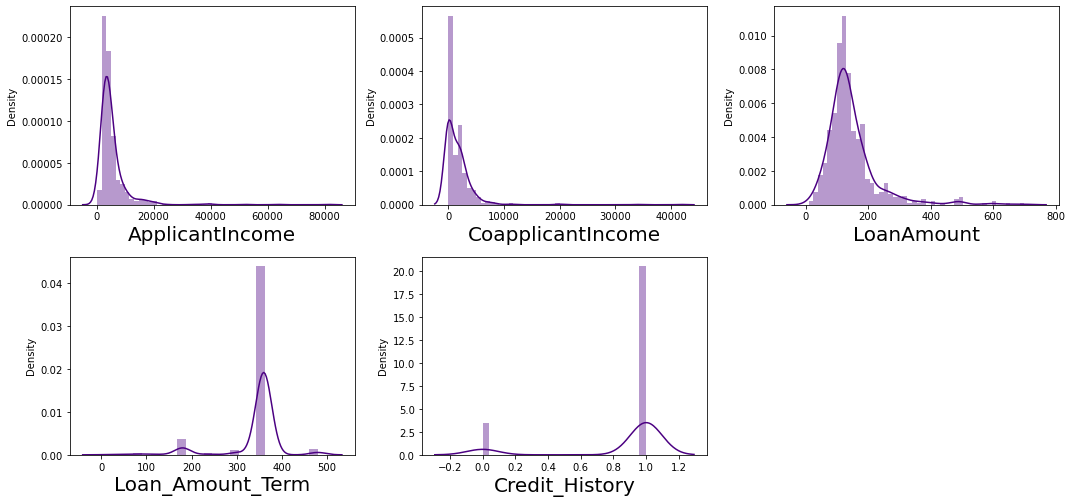

In [25]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The dataset is not normally distributed.

Applicant_income,Co_applicant, Loan_amount is skewed right. Loan_amount_term is skewed left and Credit History is scattered

## Bivariate Analysis

## Checking the relation between the features and target

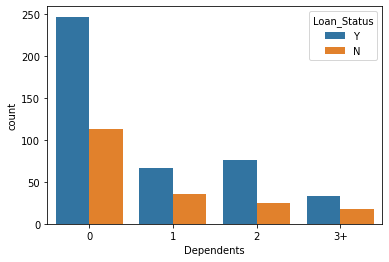

In [27]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


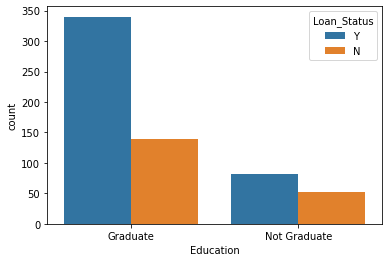

In [28]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

There are higher Graduate applicants who have loan approved

No     532
Yes     82
Name: Self_Employed, dtype: int64


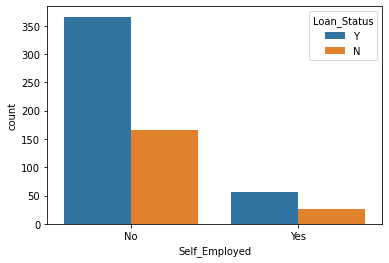

In [29]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

Maximum number of loans were approved for applicants who atre not Self Employed

1.0    525
0.0     89
Name: Credit_History, dtype: int64


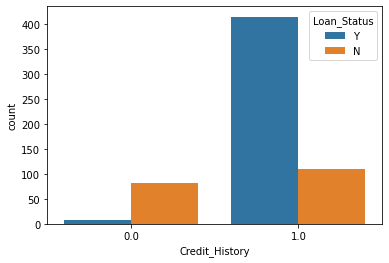

In [30]:
#Visualizing the count of the Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

higher loans were approved for applicants who have creit history as 1

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


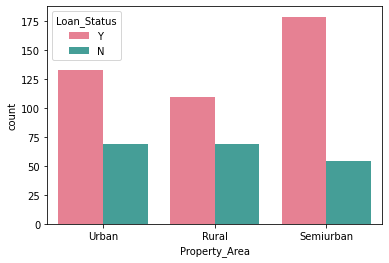

In [31]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Higher loans were approved for appliants living in Semiurban area

Male      502
Female    112
Name: Gender, dtype: int64


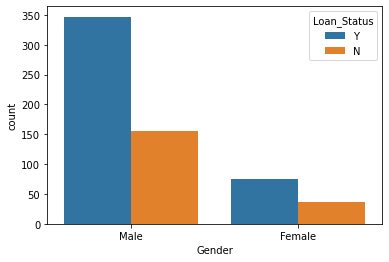

In [32]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

higher numbers of loans were apploved for Male applicants

Yes    401
No     213
Name: Married, dtype: int64


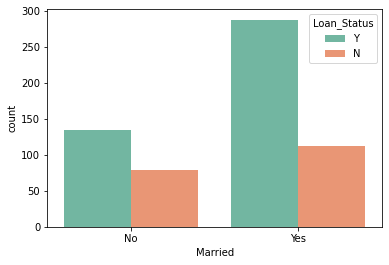

In [33]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

Married people have higher number of approved loans

## Identifying the outlier

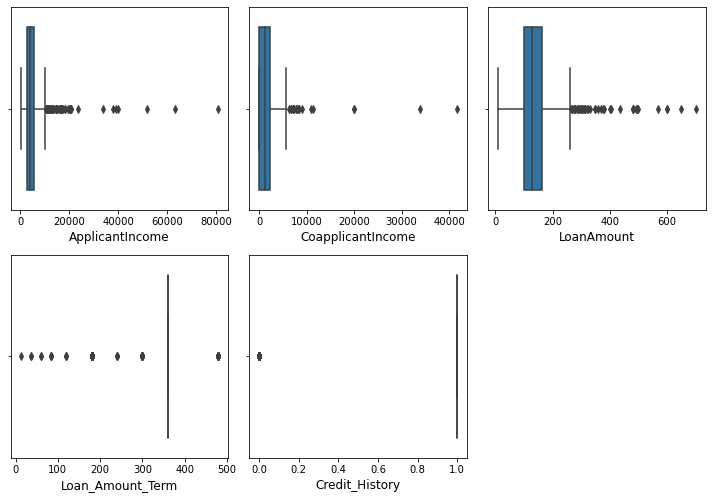

In [34]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Here we can clealy see that all the columns have outliers, we will be required to remove it

## Removing the outliers

In [35]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

In [37]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the DataFrame after removing the outliers

In [40]:
df.shape

(614, 12)

In [41]:
new_df.shape

(577, 12)

In [42]:
## Checking the skewness
new_df.skew().sort_values()

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmount           1.151525
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
dtype: float64

In [43]:
#Skewness present in all the columns. Will remove the skewness

In [44]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [45]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [46]:
new_df.skew().sort_values()

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
CoapplicantIncome   -0.191876
ApplicantIncome      0.027981
LoanAmount           0.048425
dtype: float64

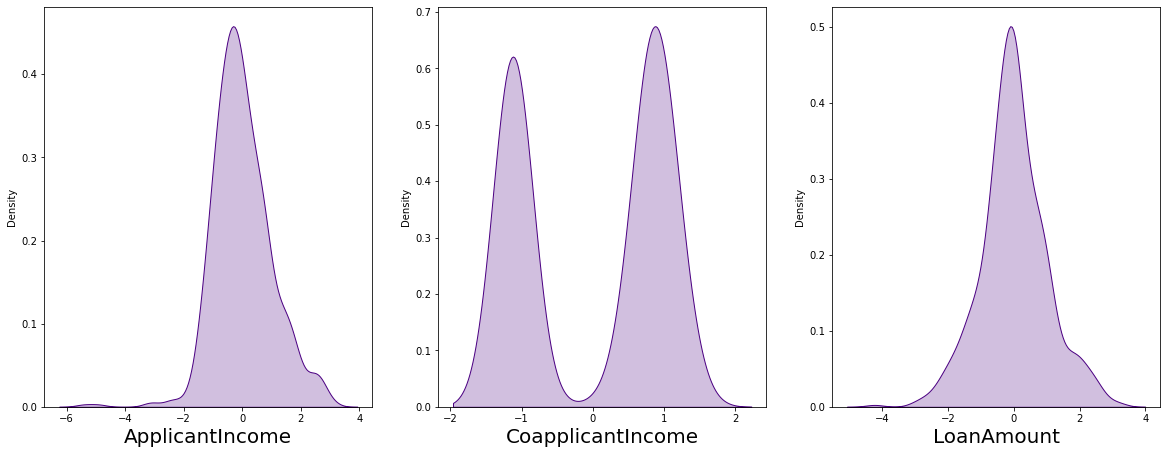

In [47]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can now see that the skewness has been removed and the dataset looks normal

## Encoding using Label Encoder

In [48]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [49]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


Here we can see that all the categorical values has been encoded

## Checking the Co-relation

In [50]:
corr=new_df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Married'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Self_Employed'),
  Text(0, 5.5, 'ApplicantIncome'),
  Text(0, 6.5, 'CoapplicantIncome'),
  Text(0, 7.5, 'LoanAmount'),
  Text(0, 8.5, 'Loan_Amount_Term'),
  Text(0, 9.5, 'Credit_History'),
  Text(0, 10.5, 'Property_Area'),
  Text(0, 11.5, 'Loan_Status')])

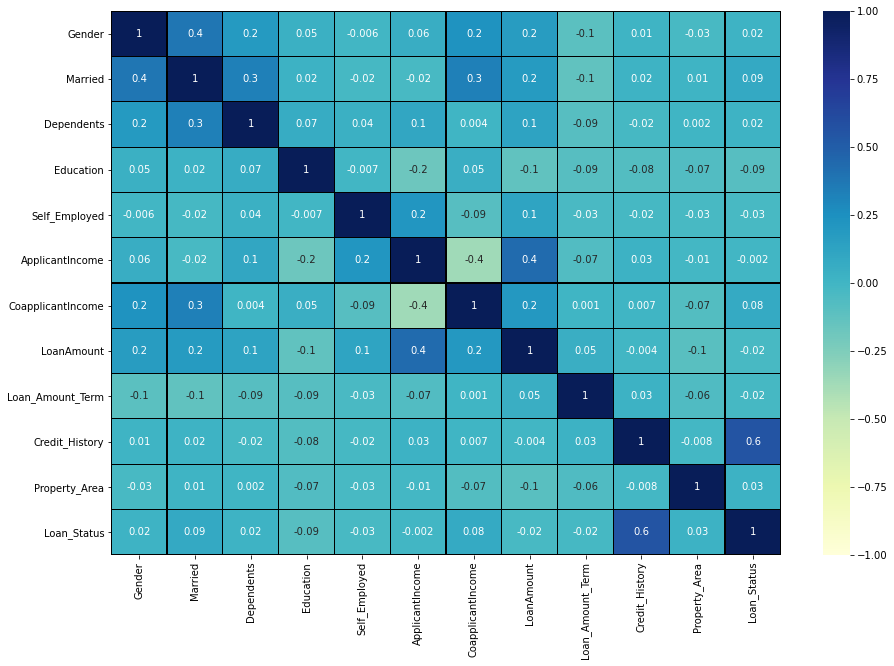

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

The target column Loan_Status is highly positively correlated with the feature Credit_History. The other features have very less correlation with the target column. Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other. ApplicantIncome and Gender is very less correlated with the target. Dark shades are highly correlated and light shades are very less correlated.

## Separating the features and label variables into x and y

In [52]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [53]:
x.shape

(577, 11)

In [54]:
y.shape

(577,)

## Feature Scaling using Standard Scaler

In [55]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


## Oversampling

In [56]:
#We have seen earlier that the target value is imbalanced, hence using SMOTE for balancing

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [57]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

Now the target variable has been balanced

In [58]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


Now the DataSet is ready for model building

## Modelling

## Finding the best random rate

In [60]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8702928870292888  on Random_state  68


Got an accuracy score of 87% at a random state of 146

## Creating Train_Test_Split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Logistic Regression

In [62]:
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)
print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

0.7615062761506276
[[ 56  46]
 [ 11 126]]
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       102
           1       0.73      0.92      0.82       137

    accuracy                           0.76       239
   macro avg       0.78      0.73      0.74       239
weighted avg       0.78      0.76      0.75       239



#### Getting an accuracy score of 76% with this model

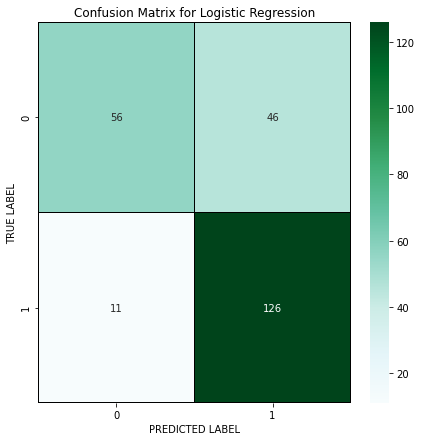

In [63]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Decission Tree Classifier

In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8158995815899581
[[ 84  18]
 [ 26 111]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       102
           1       0.86      0.81      0.83       137

    accuracy                           0.82       239
   macro avg       0.81      0.82      0.81       239
weighted avg       0.82      0.82      0.82       239



#### Got an accuracy score of 81% with this model

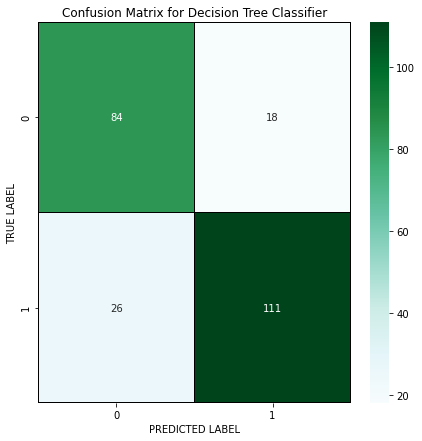

In [65]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8661087866108786
[[ 83  19]
 [ 13 124]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.87      0.91      0.89       137

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239



#### Getting an accuracy score of 86% with this model

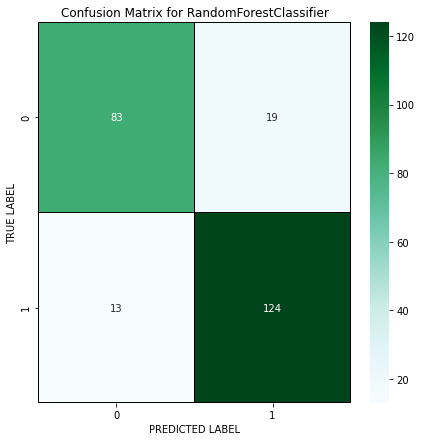

In [67]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## KNeighbors Classifier

In [68]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7866108786610879
[[ 80  22]
 [ 29 108]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       102
           1       0.83      0.79      0.81       137

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.79      0.79       239



#### Getting an accuracy score of 78% with this model

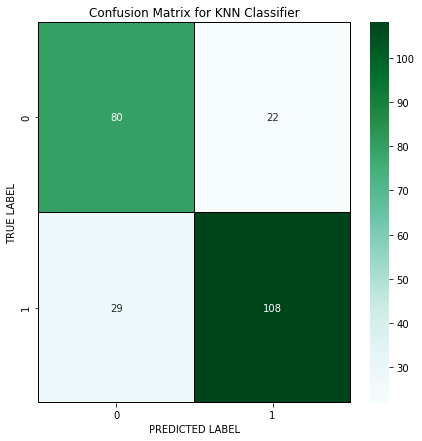

In [69]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Support Vector Machine Classifier

In [70]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7740585774058577
[[ 66  36]
 [ 18 119]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       102
           1       0.77      0.87      0.82       137

    accuracy                           0.77       239
   macro avg       0.78      0.76      0.76       239
weighted avg       0.78      0.77      0.77       239



#### Getting an accuracy score of 77% with this model

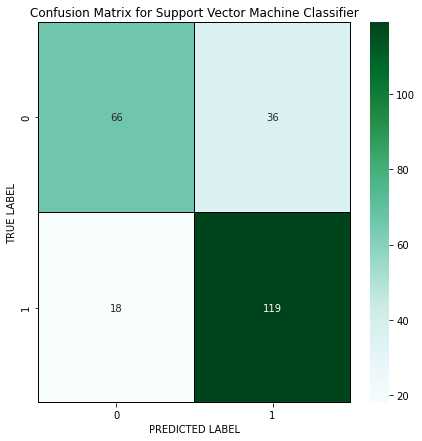

In [71]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## Checking the Cross Validation Score

In [72]:
# cv score for Logistic Regression Classifier
print(cross_val_score(log,x,y,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7123113207547169
0.7500707547169811
0.8242059748427673
0.7311635220125786
0.7336713836477987


We can here see that after analysing the scores for models and cross validation, Random Forst Classifier is the best model

## Hyper Parameter Tuning

In [88]:
# Random Forst Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [89]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [90]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [91]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [92]:
loan_status= RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
loan_status.fit(x_train, y_train)
pred = loan_status.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.84518828451883


### The accuracy score we got after hyperparametertuning is 82.84

## Plotting AUC, ROC Curve

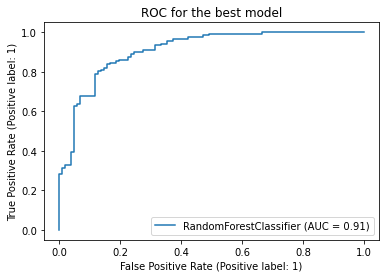

In [93]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(loan_status, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving The Model

In [94]:
import joblib
joblib.dump(loan_status,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']